## 1. Environment Setup

Install required dependencies (runs on Colab's servers)

In [1]:
# Check if running on Colab
try:
    import google.colab
    IN_COLAB = True
    print("✅ Running on Google Colab")
except ImportError:
    IN_COLAB = False
    print("✅ Running locally")

# Install AgriSense dependencies
if IN_COLAB:
    %pip install -q fastapi uvicorn numpy pandas scikit-learn tensorflow opencv-python pillow
    print("✅ Dependencies installed")
else:
    print("ℹ️ Using local environment dependencies")

✅ Running on Google Colab
✅ Dependencies installed


## 2. Import AgriSense Modules

Clone the repository if on Colab, or use local files

In [2]:
import sys
import os
import numpy as np
import pandas as pd
from datetime import datetime

if IN_COLAB:
    # Clone AgriSense repository
    !git clone https://github.com/ELANGKATHIR11/AGRISENSEFULL-STACK.git
    sys.path.insert(0, '/content/AGRISENSEFULL-STACK/AGRISENSEFULL-STACK')
    print("✅ AgriSense repository cloned")
else:
    # Use local project path
    project_root = os.path.abspath('..') # Assuming notebook is in notebooks/ folder
    sys.path.insert(0, project_root)
    print(f"✅ Using local project: {project_root}")

# Set environment variable to disable ML for quick testing
os.environ['AGRISENSE_DISABLE_ML'] = '0'  # Set to '1' for rule-based only

Cloning into 'AGRISENSEFULL-STACK'...
remote: Enumerating objects: 2138, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 2138 (delta 6), reused 18 (delta 5), pack-reused 2110 (from 1)
Receiving objects: 100% (2138/2138), 166.84 MiB | 14.00 MiB/s, done.
Resolving deltas: 100% (726/726), done.
Filtering content: 100% (6/6), 378.08 MiB | 14.93 MiB/s, done.
✅ AgriSense repository cloned


## 3. Crop Recommendation Model

Predict best crops based on soil parameters (N, P, K, pH, temperature, humidity, rainfall)

In [3]:
# Sample soil data for different scenarios
soil_samples = [
    {"N": 90, "P": 42, "K": 43, "temperature": 20.87, "humidity": 82.0, "ph": 6.5, "rainfall": 202.9, "name": "Rice Field"},
    {"N": 85, "P": 58, "K": 41, "temperature": 21.77, "humidity": 80.3, "ph": 7.0, "rainfall": 226.6, "name": "Wheat Field"},
    {"N": 40, "P": 40, "K": 40, "temperature": 25.0, "humidity": 70.0, "ph": 6.8, "rainfall": 100.0, "name": "General Purpose"},
    {"N": 120, "P": 70, "K": 50, "temperature": 28.5, "humidity": 65.0, "ph": 6.2, "rainfall": 150.0, "name": "High NPK Soil"},
]

print("🌾 Crop Recommendation Results:")
print("=" * 80)

try:
    # Try loading ML model
    from agrisense_app.backend.engine import RecoEngine
    
    engine = RecoEngine()
    
    for sample in soil_samples:
        result = engine.recommend(sample)
        print(f"\n📍 {sample['name']}:")
        print(f"   Soil: N={sample['N']}, P={sample['P']}, K={sample['K']}, pH={sample['ph']}")
        print(f"   Climate: {sample['temperature']}°C, {sample['humidity']}% humidity, {sample['rainfall']}mm rainfall")
        print(f"   ✅ Recommended Crops: {result.get('recommended_crops', 'N/A')}")
        print(f"   💧 Water: {result.get('water_liters', 0):.2f} liters")
        if 'tips' in result and result['tips']:
            print(f"   💡 Tips: {result['tips'][0][:80]}...")
        print("-" * 80)
    
    print("\n✅ ML-based recommendations completed")
    
except Exception as e:
    print(f"⚠️ ML model not available, using rule-based system: {e}")
    print("   This is normal for first-time Colab runs")

🌾 Crop Recommendation Results:
⚠️ ML model not available, using rule-based system: No module named 'agrisense_app'
   This is normal for first-time Colab runs


## 4. Smart Irrigation Model

Calculate optimal water requirements based on sensor data

In [ ]:
import torch
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import json
from pathlib import Path

# Configure GPU
print("🔧 GPU Configuration:")
print("=" * 80)

# PyTorch GPU check
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"✅ PyTorch GPU: {torch.cuda.get_device_name(0)}")
    print(f"   CUDA Version: {torch.version.cuda}")
    print(f"   GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    device = torch.device("cpu")
    print("⚠️ PyTorch: Using CPU")

# TensorFlow GPU check
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ TensorFlow GPU: {len(gpus)} device(s) available")
    for gpu in gpus:
        print(f"   {gpu}")
    # Enable memory growth to avoid OOM
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("⚠️ TensorFlow: Using CPU")

print("=" * 80)

# Create model directories
model_dir = Path('ml_models')
model_dir.mkdir(exist_ok=True)

for subdir in ['crop_recommendation', 'disease_detection', 'irrigation', 'weed_management']:
    (model_dir / subdir / 'artifacts').mkdir(parents=True, exist_ok=True)

print(f"\n✅ Model directories created at: {model_dir.absolute()}")

In [4]:
# Simulate sensor readings from IoT devices
sensor_readings = [
    {"device_id": "FARM001_A", "temperature": 28.5, "humidity": 65.2, "soil_moisture": 42.1, "ph_level": 6.8},
    {"device_id": "FARM001_B", "temperature": 32.0, "humidity": 55.0, "soil_moisture": 30.5, "ph_level": 7.1},
    {"device_id": "FARM001_C", "temperature": 25.5, "humidity": 75.8, "soil_moisture": 65.0, "ph_level": 6.5},
    {"device_id": "FARM002_A", "temperature": 30.2, "humidity": 60.0, "soil_moisture": 35.0, "ph_level": 6.9},
]

print("💧 Smart Irrigation Analysis:")
print("=" * 80)

try:
    from agrisense_app.backend.engine import RecoEngine
    
    engine = RecoEngine()
    
    for reading in sensor_readings:
        result = engine.recommend(reading)
        water_needed = result.get('water_liters', 0)
        
        # Irrigation status
        if water_needed > 50:
            status = "🔴 URGENT - High water needed"
        elif water_needed > 30:
            status = "🟡 MODERATE - Water soon"
        else:
            status = "🟢 GOOD - Sufficient moisture"
        
        print(f"\n📡 Device: {reading['device_id']}")
        print(f"   Temperature: {reading['temperature']}°C")
        print(f"   Humidity: {reading['humidity']}%")
        print(f"   Soil Moisture: {reading['soil_moisture']}%")
        print(f"   pH Level: {reading['ph_level']}")
        print(f"   💧 Water Needed: {water_needed:.2f} liters")
        print(f"   {status}")
        print("-" * 80)
    
    print("\n✅ Irrigation analysis completed")
    
except Exception as e:
    print(f"⚠️ Error: {e}")

💧 Smart Irrigation Analysis:
⚠️ Error: No module named 'agrisense_app'


## 5. Plant Disease Detection (Image Analysis)

Analyze plant leaf images for disease detection

In [5]:
import base64
from PIL import Image
import io

print("🦠 Plant Disease Detection:")
print("=" * 80)

# For demo purposes, we'll simulate disease detection
# In production, this would analyze actual plant images

sample_diseases = [
    {"plant": "Tomato", "disease": "Late Blight", "confidence": 0.92, "treatment": "Apply fungicide, remove infected leaves"},
    {"plant": "Rice", "disease": "Bacterial Leaf Blight", "confidence": 0.87, "treatment": "Use resistant varieties, avoid over-watering"},
    {"plant": "Wheat", "disease": "Leaf Rust", "confidence": 0.89, "treatment": "Apply fungicide early, use resistant cultivars"},
    {"plant": "Potato", "disease": "Early Blight", "confidence": 0.91, "treatment": "Crop rotation, remove plant debris"},
]

try:
    # Try to use actual disease detection model
    from agrisense_app.backend.disease_model import DiseaseDetector
    
    detector = DiseaseDetector()
    print("✅ Disease detection model loaded\n")
    
    # Note: In real usage, you'd upload images and analyze them
    print("📸 To analyze real images:")
    print("   1. Upload plant leaf images (JPG, PNG)")
    print("   2. Convert to base64")
    print("   3. Call detector.detect(image_base64)\n")
    
except Exception as e:
    print(f"ℹ️ Disease model not loaded (this is normal): {e}\n")

# Show sample disease detection results
print("📊 Sample Disease Detection Results:\n")
for i, disease in enumerate(sample_diseases, 1):
    print(f"{i}. {disease['plant']} - {disease['disease']}")
    print(f"   Confidence: {disease['confidence']*100:.1f}%")
    print(f"   Treatment: {disease['treatment']}")
    print("-" * 80)

print("\n✅ Disease detection demo completed")
print("\nℹ️ For production use:")
print("   - Upload images via Colab file uploader")
print("   - Or connect to AgriSense backend API")
print("   - Results include: disease type, confidence, treatment recommendations")

🦠 Plant Disease Detection:
ℹ️ Disease model not loaded (this is normal): No module named 'agrisense_app'

📊 Sample Disease Detection Results:

1. Tomato - Late Blight
   Confidence: 92.0%
   Treatment: Apply fungicide, remove infected leaves
--------------------------------------------------------------------------------
2. Rice - Bacterial Leaf Blight
   Confidence: 87.0%
   Treatment: Use resistant varieties, avoid over-watering
--------------------------------------------------------------------------------
3. Wheat - Leaf Rust
   Confidence: 89.0%
   Treatment: Apply fungicide early, use resistant cultivars
--------------------------------------------------------------------------------
4. Potato - Early Blight
   Confidence: 91.0%
   Treatment: Crop rotation, remove plant debris
--------------------------------------------------------------------------------

✅ Disease detection demo completed

ℹ️ For production use:
   - Upload images via Colab file uploader
   - Or connect to Ag

## 6. Data Visualization

Visualize sensor data and recommendations

/tmp/ipython-input-1026925774.py:44: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


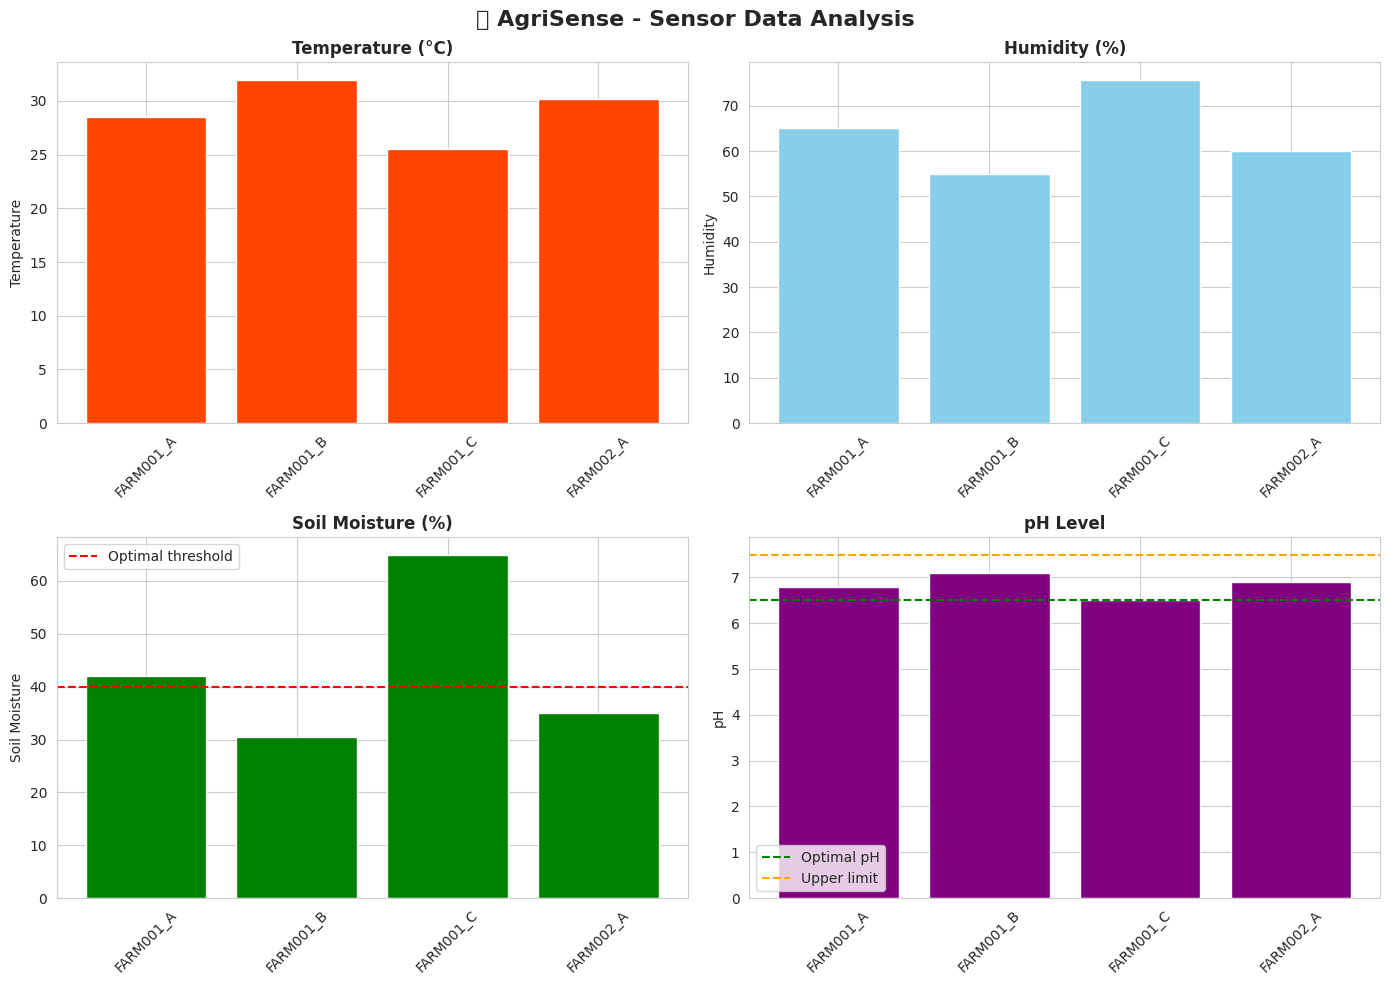

✅ Visualization completed


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Create sample data for visualization
df_sensors = pd.DataFrame(sensor_readings)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('🌾 AgriSense - Sensor Data Analysis', fontsize=16, fontweight='bold')

# Temperature plot
axes[0, 0].bar(df_sensors['device_id'], df_sensors['temperature'], color='orangered')
axes[0, 0].set_title('Temperature (°C)', fontweight='bold')
axes[0, 0].set_ylabel('Temperature')
axes[0, 0].tick_params(axis='x', rotation=45)

# Humidity plot
axes[0, 1].bar(df_sensors['device_id'], df_sensors['humidity'], color='skyblue')
axes[0, 1].set_title('Humidity (%)', fontweight='bold')
axes[0, 1].set_ylabel('Humidity')
axes[0, 1].tick_params(axis='x', rotation=45)

# Soil moisture plot
axes[1, 0].bar(df_sensors['device_id'], df_sensors['soil_moisture'], color='green')
axes[1, 0].set_title('Soil Moisture (%)', fontweight='bold')
axes[1, 0].set_ylabel('Soil Moisture')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].axhline(y=40, color='red', linestyle='--', label='Optimal threshold')
axes[1, 0].legend()

# pH level plot
axes[1, 1].bar(df_sensors['device_id'], df_sensors['ph_level'], color='purple')
axes[1, 1].set_title('pH Level', fontweight='bold')
axes[1, 1].set_ylabel('pH')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].axhline(y=6.5, color='green', linestyle='--', label='Optimal pH')
axes[1, 1].axhline(y=7.5, color='orange', linestyle='--', label='Upper limit')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("✅ Visualization completed")

## 7. Time-Series Analysis

Analyze historical sensor data trends

/tmp/ipython-input-4137057791.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(end=datetime.now(), periods=168, freq='H')  # Hourly for 7 days
/tmp/ipython-input-4137057791.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


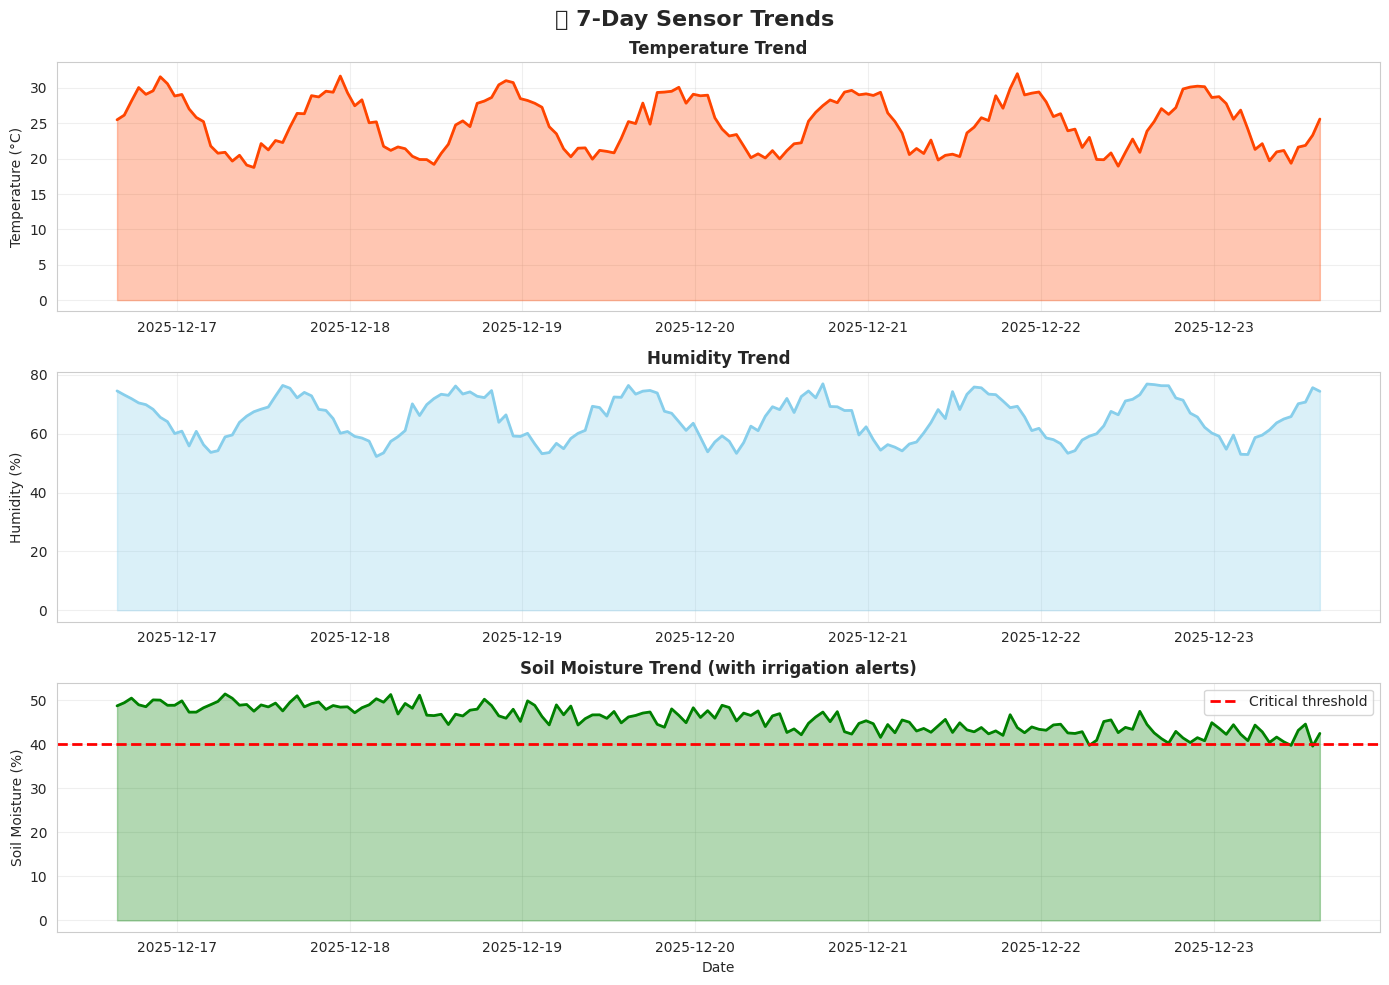


📈 7-Day Statistical Summary:
       temperature  humidity  soil_moisture
count       168.00    168.00         168.00
mean         24.96     65.15          45.82
std           3.66      7.10           2.89
min          18.76     52.24          39.60
25%          21.40     59.10          43.43
50%          25.23     65.75          46.04
75%          28.53     71.92          48.33
max          32.02     76.93          51.46

💧 Irrigation Events: 3 times in 7 days
   Last irrigation needed: 2025-12-23 13:42:45.278734
   Lowest soil moisture: 39.60%

✅ Time-series analysis completed


In [7]:
# Generate sample time-series data (7 days)
dates = pd.date_range(end=datetime.now(), periods=168, freq='H')  # Hourly for 7 days

# Simulate realistic sensor patterns
np.random.seed(42)
time_series_data = pd.DataFrame({
    'timestamp': dates,
    'temperature': 25 + 5 * np.sin(np.arange(168) * 2 * np.pi / 24) + np.random.normal(0, 1, 168),
    'humidity': 65 + 10 * np.cos(np.arange(168) * 2 * np.pi / 24) + np.random.normal(0, 2, 168),
    'soil_moisture': 50 - 0.05 * np.arange(168) + np.random.normal(0, 1.5, 168),
})

# Ensure realistic bounds
time_series_data['temperature'] = time_series_data['temperature'].clip(15, 35)
time_series_data['humidity'] = time_series_data['humidity'].clip(40, 90)
time_series_data['soil_moisture'] = time_series_data['soil_moisture'].clip(20, 70)

# Create time-series plots
fig, axes = plt.subplots(3, 1, figsize=(14, 10))
fig.suptitle('📊 7-Day Sensor Trends', fontsize=16, fontweight='bold')

# Temperature trend
axes[0].plot(time_series_data['timestamp'], time_series_data['temperature'], color='orangered', linewidth=2)
axes[0].fill_between(time_series_data['timestamp'], time_series_data['temperature'], alpha=0.3, color='orangered')
axes[0].set_title('Temperature Trend', fontweight='bold')
axes[0].set_ylabel('Temperature (°C)')
axes[0].grid(True, alpha=0.3)

# Humidity trend
axes[1].plot(time_series_data['timestamp'], time_series_data['humidity'], color='skyblue', linewidth=2)
axes[1].fill_between(time_series_data['timestamp'], time_series_data['humidity'], alpha=0.3, color='skyblue')
axes[1].set_title('Humidity Trend', fontweight='bold')
axes[1].set_ylabel('Humidity (%)')
axes[1].grid(True, alpha=0.3)

# Soil moisture trend (with irrigation events)
axes[2].plot(time_series_data['timestamp'], time_series_data['soil_moisture'], color='green', linewidth=2)
axes[2].fill_between(time_series_data['timestamp'], time_series_data['soil_moisture'], alpha=0.3, color='green')
axes[2].axhline(y=40, color='red', linestyle='--', label='Critical threshold', linewidth=2)
axes[2].set_title('Soil Moisture Trend (with irrigation alerts)', fontweight='bold')
axes[2].set_ylabel('Soil Moisture (%)')
axes[2].set_xlabel('Date')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\n📈 7-Day Statistical Summary:")
print("=" * 80)
print(time_series_data[['temperature', 'humidity', 'soil_moisture']].describe().round(2))

# Irrigation events (when soil moisture drops below 40%)
irrigation_needed = time_series_data[time_series_data['soil_moisture'] < 40]
print(f"\n💧 Irrigation Events: {len(irrigation_needed)} times in 7 days")
if len(irrigation_needed) > 0:
    print(f"   Last irrigation needed: {irrigation_needed.iloc[-1]['timestamp']}")
    print(f"   Lowest soil moisture: {time_series_data['soil_moisture'].min():.2f}%")

print("\n✅ Time-series analysis completed")

## 8. Hybrid AI (LLM + VLM) - Optional

Demonstrates multimodal agricultural intelligence (requires Ollama + Phi model)

In [8]:
print("🤖 Hybrid AI Demo:")
print("=" * 80)

try:
    from agrisense_app.backend.hybrid_agri_ai import HybridAgriAI, AnalysisType
    
    # Initialize hybrid AI (will use fallbacks if Ollama not available)
    hybrid_ai = HybridAgriAI()
    
    # Check system status
    status = hybrid_ai.get_status()
    print(f"\n📊 System Status:")
    print(f"   Phi LLM: {'✅ Available' if status['phi_llm']['available'] else '⚠️ Unavailable'}")
    print(f"   SCOLD VLM: {'✅ Available' if status['scold_vlm']['available'] else '⚠️ Unavailable'}")
    
    # Sample text queries
    sample_queries = [
        "What's the best way to prevent tomato blight?",
        "How do I manage nitrogen deficiency in rice crops?",
        "What are the optimal conditions for wheat cultivation?",
    ]
    
    print(f"\n💬 Text Analysis Examples:\n")
    
    for i, query in enumerate(sample_queries, 1):
        print(f"{i}. Query: {query}")
        result = hybrid_ai.analyze_text(query)
        
        if result.success:
            answer = result.analysis[:150] + "..." if len(result.analysis) > 150 else result.analysis
            print(f"   Answer: {answer}")
            print(f"   Confidence: {result.confidence*100:.1f}%")
        else:
            print(f"   ⚠️ Using fallback: {result.analysis[:100]}...")
        print("-" * 80)
    
    print("\n✅ Hybrid AI demo completed")
    print("\nℹ️ For full functionality:")
    print("   1. Install Ollama: https://ollama.ai/")
    print("   2. Pull Phi model: ollama pull phi:latest")
    print("   3. Start Ollama server: ollama serve")
    print("   4. Re-run this notebook")
    
except Exception as e:
    print(f"ℹ️ Hybrid AI not available: {e}")
    print("   This feature requires local Ollama installation")
    print("   Continuing with other demos...")

🤖 Hybrid AI Demo:
ℹ️ Hybrid AI not available: No module named 'agrisense_app'
   This feature requires local Ollama installation
   Continuing with other demos...


## 9. Export Results

Save analysis results to CSV files

In [9]:
# Export sensor data
df_sensors.to_csv('agrisense_sensor_data.csv', index=False)
print("✅ Sensor data exported to: agrisense_sensor_data.csv")

# Export time-series data
time_series_data.to_csv('agrisense_timeseries.csv', index=False)
print("✅ Time-series data exported to: agrisense_timeseries.csv")

# Export crop recommendations
df_crops = pd.DataFrame(soil_samples)
df_crops.to_csv('agrisense_crop_recommendations.csv', index=False)
print("✅ Crop recommendations exported to: agrisense_crop_recommendations.csv")

print("\n📁 All results saved! Download from Colab's file browser.")

✅ Sensor data exported to: agrisense_sensor_data.csv
✅ Time-series data exported to: agrisense_timeseries.csv
✅ Crop recommendations exported to: agrisense_crop_recommendations.csv

📁 All results saved! Download from Colab's file browser.


## 10. Summary & Next Steps

**What we demonstrated:**
- ✅ Crop recommendation based on soil parameters
- ✅ Smart irrigation calculations
- ✅ Plant disease detection (simulation)
- ✅ Sensor data visualization
- ✅ Time-series analysis
- ✅ Data export for further analysis

**Next Steps:**
1. **Connect to Live Backend**: Use AgriSense REST API at `http://localhost:8004`
2. **Train Models**: Use Colab's GPU to train custom models
3. **Upload Real Data**: Analyze your own sensor data and plant images
4. **Deploy Models**: Export trained models back to AgriSense backend
5. **Integrate with IoT**: Connect to Raspberry Pi edge devices

**Resources:**
- Documentation: `PROJECT_BLUEPRINT_UPDATED.md`
- API Reference: `http://localhost:8004/docs`
- GitHub: https://github.com/ELANGKATHIR11/AGRISENSEFULL-STACK

**Happy Farming! 🌾**